In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import gseapy as gp

from gseapy import barplot, dotplot

In [5]:
def overlap_to_percent(listlike):
    return [int(i.split('/')[0]) /int(i.split('/')[1]) for i in listlike]

In [6]:
import sys
sys.path.insert(0, '../../scripts')
from common_funcs import *

In [7]:
import matplotlib.ticker as ticker

In [8]:
data = '../../data/processed/for_figures/abc/up_and_up/{}_human_biased_pair.tsv'

In [9]:
gene_list_f = '../../data/processed/for_figures/abc/up_and_up/{}_biased_pair_genes.txt'

In [10]:
cell_types = read_list('../../data/ref/cluster_list.txt')

In [11]:
bg = '../../data/processed/gene_lists_for_go/divergent/background_{}.txt'

In [12]:
f = '../../data/processed/for_figures/abc/up_and_up/all_human_biased_abc_genes_target_by_abc_peak.tsv'

In [13]:
glia = [
    # 'Astro',
        'ODC',
        # 'MGC',
        'OPC']

In [14]:
glia_genes = []
for ct in cell_types:
    if ct in ['ChC', 'L6_IT_CAR3']:
        continue
    dat = pd.read_csv(data.format(ct), sep='\t', header=None)
    glia_genes.append(np.unique(dat[4]))
    save_list(gene_list_f.format(ct), np.unique(dat[4]))
save_list(gene_list_f.format('glia'), np.unique(np.concatenate(glia_genes)))

1463

In [15]:
dat = pd.read_csv(f, sep='\t', header=None)
save_list(gene_list_f.format('all'), np.unique(dat[1]))

1463

In [39]:
def plot_enr(df, ax, 
             top_term=10, 
             color = 'odds',
             max_size = 320,
             round_to=5):
    use_term = df.loc[df['Adjusted P-value'] < 1e-2 * 5].head(top_term)
    use_term['gene_number'] = [i.count(';') +1  for i in use_term['Genes']]
    use_term = use_term.loc[use_term.gene_number > 1] 
    top_term = use_term.shape[0]
    term_names =[i.split('(GO')[0] for i in use_term['Term']]
    term_order = np.flip(np.arange(top_term))
    term_x = -1*np.log10(use_term['Adjusted P-value'])
    term_number = np.array([int(i.split('/')[0]) for i in use_term['Overlap']])
    term_size = term_number/term_number.max() * max_size
    term_proportion = [int(i.split('/')[0])/int(i.split('/')[1]) for i in use_term['Overlap']]
    term_odds = use_term['Odds Ratio']
    if color == 'odds':
        term_color = term_odds
        c_label = 'odds ratio'
    if color == 'proportion':
        term_color = term_proportion
        c_label = 'proportion of genes in background'
    if color == 'score':
        term_color = use_term['Combined Score']
        c_label = 'Z score of expected rank'
    im  = ax.scatter(term_x, term_order, s=term_size, c=term_color, cmap='viridis')
    cbar = plt.colorbar(im, shrink=.35, pad=.2)

    ax.set_yticks(term_order, labels=term_names)
    ax.set_xlabel('-log10 adjusted P-value')
    leg = ax.legend(handles=[plt.scatter([],[],
                                         s=size, 
                                         edgecolors=None, 
                                         c='black', label=int(np.floor(
                                             (size/max_size * term_number.max())/round_to
                                         )*round_to)) for size in [max_size, max_size//4 * 3, max_size//2, max_size//4 * 1]], title="N genes", 
                   bbox_to_anchor=(1, 1.025), 
                   labelspacing=.9)
    cbar.set_label(c_label,
                   rotation=90,
                   labelpad=1,) 
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    return ax

In [29]:
ct = 'all'

In [30]:
bg2 = '../../data/processed/gene_lists_for_go/divergent/human/{}_up_test_lrt.txt'

In [31]:
x = bg.format(ct)

In [32]:
!wc -l $x

wc: ../../data/processed/gene_lists_for_go/divergent/background_all.txt: No such file or directory


In [56]:
ct = 'MGC'

In [57]:
gene_list = gene_list_f.format(ct)
gene_sets = ['GO_Biological_Process_2023', ]
# background = bg.format(ct)
# background = bg2.format(ct)
background = '../../data/processed/for_figures/abc/abc_background_genes.tsv'
# bg2.format(ct)
# bg_2.format(ct)

enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

In [59]:
# bg = '../../data/processed/gene_lists_for_go/divergent/background_{}.txt'

In [60]:
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Negative Regulation Of Viral Entry Into Host C...,3/18,0.000002,0.000809,0,0,153.507692,1999.479783,CH25H;CIITA;GSN
1,GO_Biological_Process_2023,O-glycan Processing (GO:0016266),3/41,0.000028,0.005166,0,0,60.525304,634.173910,ST6GAL1;GALNT2;B3GNT5
2,GO_Biological_Process_2023,Amino Sugar Metabolic Process (GO:0006040),2/9,0.000073,0.008884,0,0,211.259259,2013.353856,CSGALNACT1;ST6GAL1
3,GO_Biological_Process_2023,Protein O-linked Glycosylation (GO:0006493),3/93,0.000326,0.027856,0,0,25.488462,204.652580,ST6GAL1;GALNT2;B3GNT5
4,GO_Biological_Process_2023,Negative Regulation Of Viral Life Cycle (GO:19...,2/20,0.000380,0.027856,0,0,82.111111,646.758780,CIITA;GSN


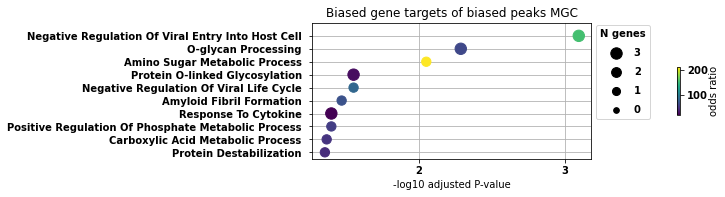

In [66]:
# dotplot(enr.res2d.loc[[0, 3, 4, 9, 13, 14]], title ='Mammal not ubiquitous conserved', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 2.5))
ax = plot_enr(enr.res2d, ax, round_to=1, max_size=130)
ax.grid()
ax.set_ylim(-.5, 10)
ax.set_axisbelow(True)
ax.set_title(f'Biased gene targets of biased peaks {ct}')
plt.savefig("../../figures/abc/double_biased_MGC.pdf", transparent=True, dpi=400, bbox_inches='tight')

In [44]:
ct='OPC'
gene_list = gene_list_f.format(ct)
gene_sets = ['GO_Biological_Process_2023', ]
# background = bg.format(ct)
# background = bg2.format(ct)
background = '../../data/processed/for_figures/abc/abc_background_genes.tsv'
# bg2.format(ct)
# bg_2.format(ct)

In [45]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


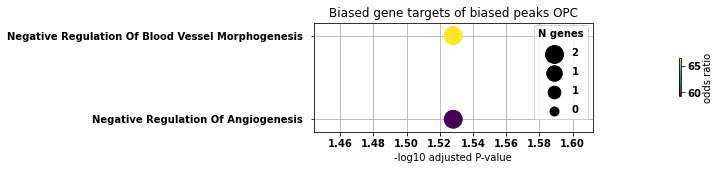

In [54]:
# dotplot(enr.res2d.loc[[0, 3, 4, 9, 13, 14]], title ='Mammal not ubiquitous conserved', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 2))
ax = plot_enr(enr.res2d, ax, round_to=1)
ax.grid()
ax.set_axisbelow(True)
ax.set_title(f'Biased gene targets of biased peaks {ct}')
ax.set_ylim(-.15, 1.15)
plt.savefig("../../figures/abc/double_biased_OPC.pdf", transparent=True, dpi=400, bbox_inches='tight')


In [107]:
enr.res2d.head(2)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Negative Regulation Of Blood Vessel Morphogene...,2/77,0.000645,0.029641,0,0,66.383333,487.635885,TEK;THBS2
1,GO_Biological_Process_2023,Negative Regulation Of Angiogenesis (GO:0016525),2/86,0.000804,0.029641,0,0,59.244048,422.155178,TEK;THBS2


In [14]:
gene_list = lists.format(types[1])
# gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/active_protein_coding.txt'

In [15]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)
# dotplot(enr.res2d.loc[[0, 3, 4, 9, 13, 14]], title ='Mammal not ubiquitous conserved', cmap='viridis')
# fig, ax = plt.subplots(figsize=(7.7, 5))
# ax = plot_enr(enr.res2d, ax)
# ax.grid()
# ax.set_axisbelow(True)
# ax.set_title('Human specific peaks ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_non_ubiquitous_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-25 20:15:49,559 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [16]:
# gene_list = cluster_genes.format('exc')
gene_list = lists.format(types[2])
gene_sets = ['GO_Biological_Process_2021', ]
# background = '../../../data/outputs/gex_cons_levels/level1/all_level1.txt'

In [17]:
types[2]

'level3_mammal'

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


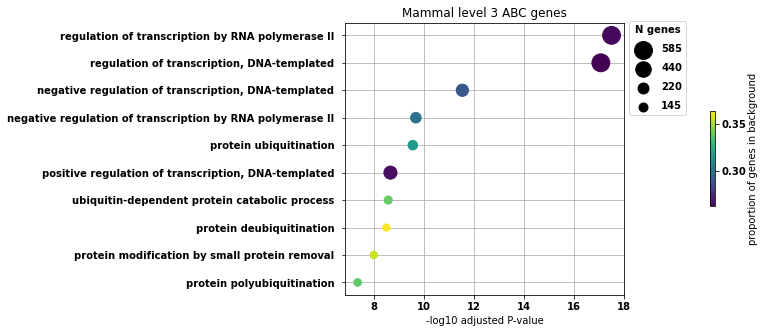

In [18]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('Mammal level 3 ABC genes')
plt.savefig("../../../figures/for_nathan/mammal_L3_ABC_genes.png", transparent=True, dpi=400, bbox_inches='tight')

In [19]:
# gene_list = cluster_genes.format('exc')
gene_list = lists.format(types[3])
gene_sets = ['GO_Biological_Process_2021', ]
# background = '../../../data/outputs/gex_cons_levels/level1/all_level1.txt'

In [20]:
types[2]

'level3_mammal'

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


Text(0.5, 1.0, 'Primate level3 peaks ABC genes')

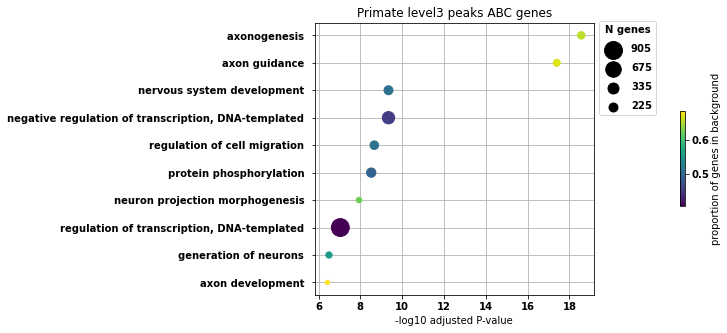

In [21]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('Primate level3 peaks ABC genes')
# plt.savefig("../../../figures/for_nathan/primate_L3_abc_genes.png", transparent=True, dpi=400, bbox_inches='tight')

In [22]:
gene_list = lists.format(types[0])
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/active_protein_coding.txt'

In [23]:
gene_list = '../../../data/for_figures/nathan/human_specific_peaks_in_te_abc_gene_with_highest_abc_for_each_peak_any_cell.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/active_protein_coding.txt'

In [24]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-25 20:16:22,403 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [25]:
# # dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
# fig, ax = plt.subplots(figsize=(7.7, 5))
# ax = plot_enr(enr.res2d, ax)
# ax.grid()
# ax.set_axisbelow(True)
# ax.set_title('TE ABC peaks')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')

# fine mapped peaks

In [26]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_overlapping_bipolar_ppa_0.01_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [27]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-25 20:16:25,284 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [28]:
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,regulation of cation channel activity (GO:2001...,2/89,0.004662,0.113237,0,0,21.773399,116.887692,RELN;KCNS1
1,GO_Biological_Process_2021,positive regulation of AMPA receptor activity ...,1/5,0.005737,0.113237,0,0,226.965909,1171.318505,RELN
2,GO_Biological_Process_2021,R-loop disassembly (GO:0062176),1/5,0.005737,0.113237,0,0,226.965909,1171.318505,SRPK2
3,GO_Biological_Process_2021,reelin-mediated signaling pathway (GO:0038026),1/5,0.005737,0.113237,0,0,226.965909,1171.318505,RELN
4,GO_Biological_Process_2021,cerebral cortex cell migration (GO:0021795),1/6,0.006881,0.113237,0,0,181.563636,904.004600,RELN


In [29]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_overlapping_ad_ppa_0.01_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [30]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


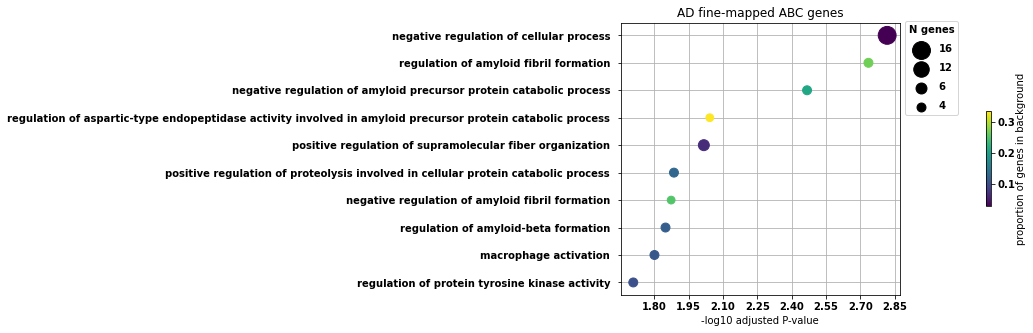

In [31]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('AD fine-mapped ABC genes')
plt.savefig("../../../figures/for_nathan/AD_fine_mapped_bac.png", transparent=True, dpi=400, bbox_inches='tight')

In [32]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_overlapping_schizophrenia_ppa_0.01_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [33]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-25 20:16:33,146 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [34]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
# fig, ax = plt.subplots(figsize=(7.7, 5))
# ax = plot_enr(enr.res2d, ax)
# ax.grid()
# ax.set_axisbelow(True)
# ax.set_title('AD fine-mapped ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')

In [35]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_overlapping_ms_risk_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [36]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


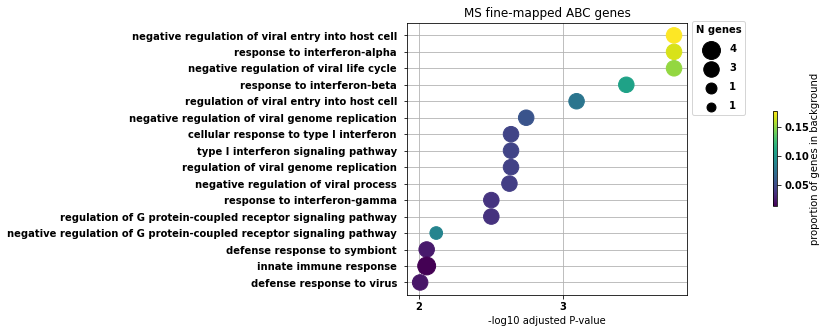

In [37]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=16)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('MS fine-mapped ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/MS_fine_mapped_abc.png", transparent=True, dpi=400, bbox_inches='tight')

Text(0.5, 1.0, 'MS fine-mapped ABC genes')

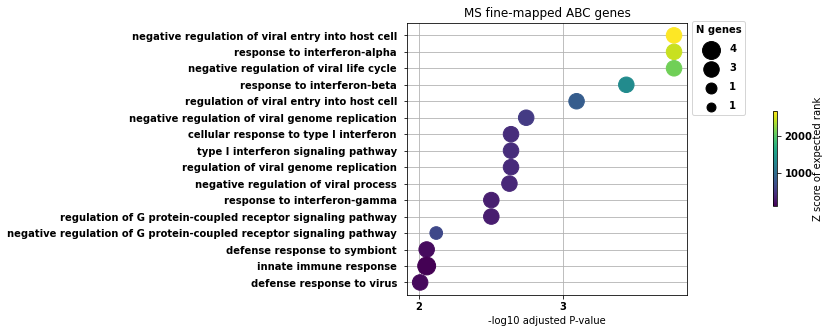

In [38]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=16, color='score')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('MS fine-mapped ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
# plt.savefig("../../../figures/for_nathan/MS_fine_mapped_abc.png", transparent=True, dpi=400, bbox_inches='tight')

Text(0.5, 1.0, 'MS fine-mapped ABC genes')

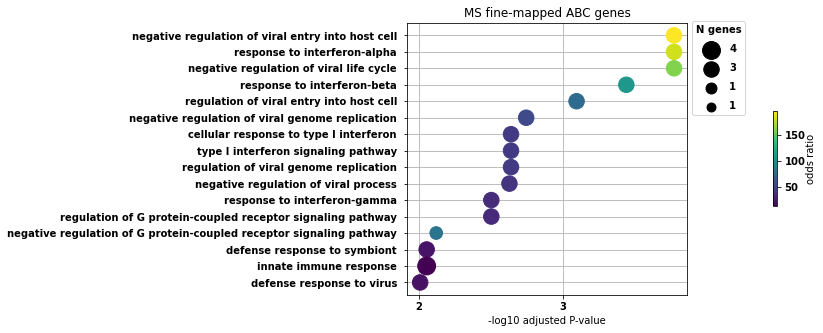

In [39]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=16, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('MS fine-mapped ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
# plt.savefig("../../../figures/for_nathan/MS_fine_mapped_abc.png", transparent=True, dpi=400, bbox_inches='tight')

Text(0.5, 1.0, 'MS fine-mapped ABC genes')

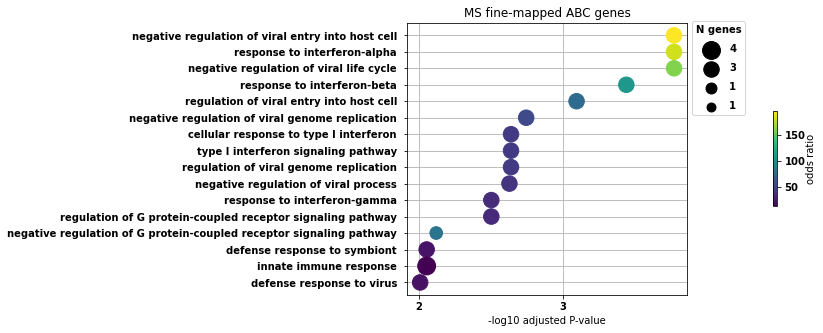

In [41]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=16, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('MS fine-mapped ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
# plt.savefig("../../../figures/for_nathan/MS_fine_mapped_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [42]:
ms_check = enr.res2d

In [44]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_highest_abc_overlapping_bipolar_ppa_0.01_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [45]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-25 20:16:41,940 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [47]:
# # dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
# fig, ax = plt.subplots(figsize=(7.7, 5))
# ax = plot_enr(enr.res2d, ax, round_to=1, )
# ax.grid()
# ax.set_axisbelow(True)
# ax.set_title('MS fine-mapped ABC genes')
# # plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
# plt.savefig("../../../figures/for_nathan/bipolar_fine_mapped_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [48]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_highest_abc_overlapping_ad_ppa_0.01_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [49]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


In [50]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_highest_abc_overlapping_ad_ppa_0.01_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [51]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


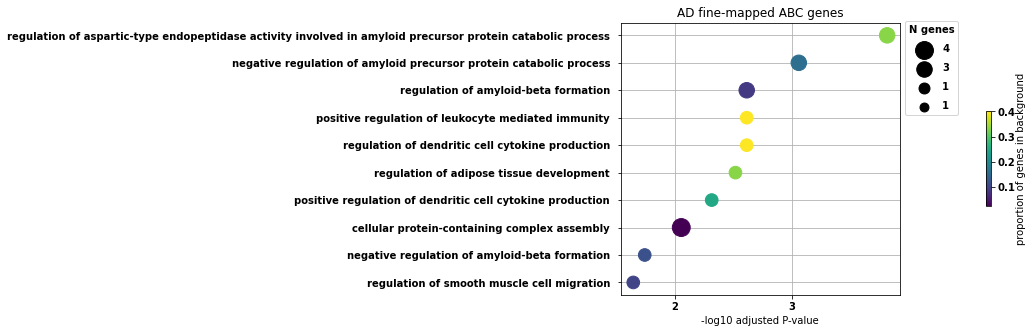

In [52]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=15)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('AD fine-mapped ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/AD_fine_mapped_highest_gene_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [53]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_highest_abc_overlapping_schizophrenia_ppa_0.01_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [54]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


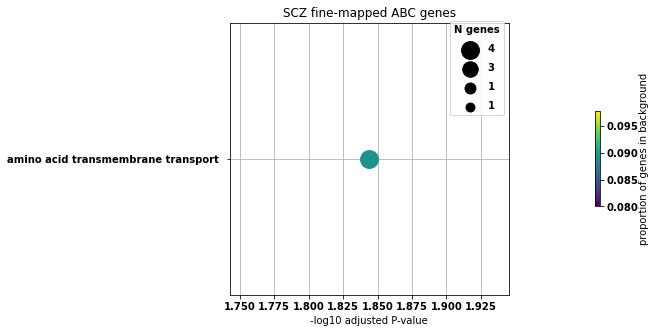

In [55]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=15)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('SCZ fine-mapped ABC genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/SCZ_fine_mapped_highest_gene_abc.png", transparent=True, dpi=400, bbox_inches='tight')

# abc levels

In [76]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/human_only_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [77]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


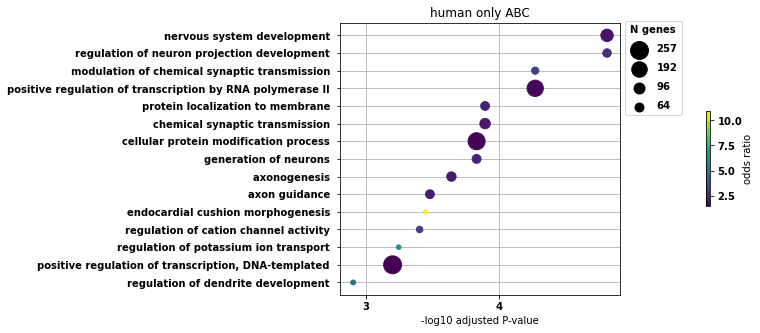

In [78]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=15)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('human only ABC')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/human_only_abc_loops.png", transparent=True, dpi=400, bbox_inches='tight')

In [79]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/human_specific_in_te_abc_target_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [80]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-25 20:26:39,454 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [81]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/level2_mammal_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [82]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


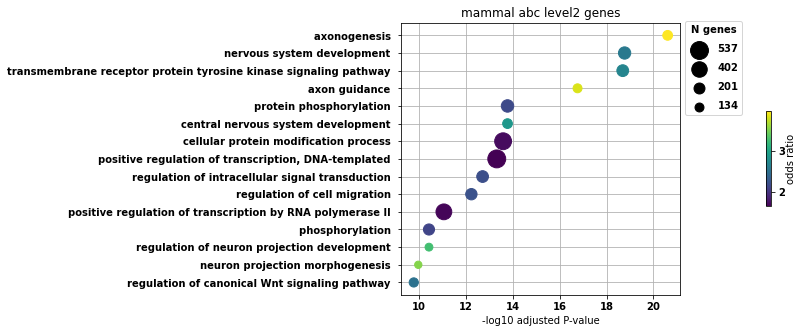

In [83]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=15)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('mammal abc level2 genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/mammal_level2_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [84]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/level2_primate_only_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [85]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


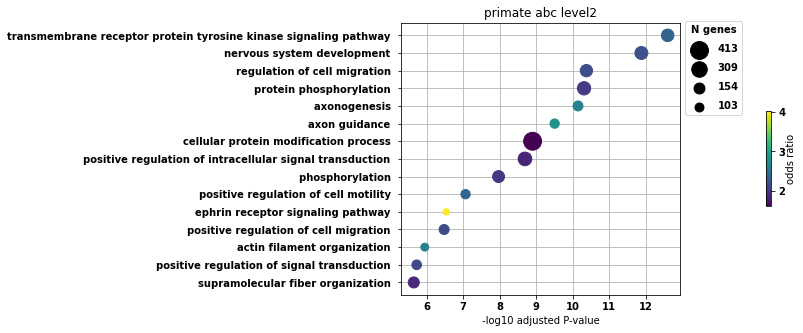

In [86]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=15)
ax.grid()
ax.set_axisbelow(True)
ax.set_title('primate abc level2')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/primate_level2_abc_genes.png", transparent=True, dpi=400, bbox_inches='tight')

In [87]:
gene_list = '../../../data/for_figures/nathan/fine_mapped/human_atac_peaks_overlapping_233_ms_risk_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [88]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


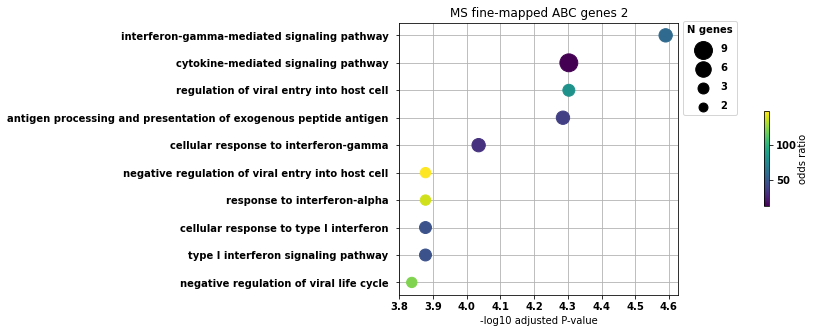

In [93]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=10, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('MS fine-mapped ABC genes 2')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/MS_fine_mapped_3_25_2023_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [12]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/human_specific_peak_in_ERVK_abc_targets.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [13]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


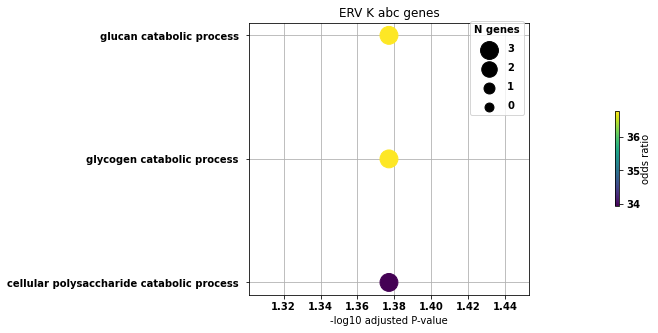

In [16]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=10, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('ERV K abc genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/ERVK_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [15]:
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,glucan catabolic process (GO:0009251),3/15,0.000138,0.041964,0,0,36.759259,326.825723,PYGB;STBD1;PHKA1
1,GO_Biological_Process_2021,glycogen catabolic process (GO:0005980),3/15,0.000138,0.041964,0,0,36.759259,326.825723,PYGB;STBD1;PHKA1
2,GO_Biological_Process_2021,cellular polysaccharide catabolic process (GO:...,3/16,0.000169,0.041964,0,0,33.929915,294.796450,PYGB;STBD1;PHKA1
3,GO_Biological_Process_2021,postsynaptic endocytosis (GO:0140239),2/5,0.000466,0.069660,0,0,97.348039,746.733334,MX1;DNM1
4,GO_Biological_Process_2021,postsynaptic neurotransmitter receptor interna...,2/5,0.000466,0.069660,0,0,97.348039,746.733334,MX1;DNM1


In [17]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/human_specific_peak_in_L1_abc_targets.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [18]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-29 22:07:26,216 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


ValueError: zero-size array to reduction operation maximum which has no identity

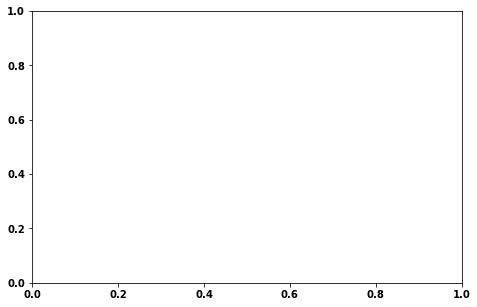

In [19]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=10, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('ERV K abc genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/ERVK_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [ ]:
enr.res2d.head()

In [23]:
!ls ../../../data/for_figures/nathan/abc_3_25/non_te_abc*

../../../data/for_figures/nathan/abc_3_25/non_te_abc_genes.txt
../../../data/for_figures/nathan/abc_3_25/non_te_abc_highest_genes.txt


In [30]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/non_te_abc_highest_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [33]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/non_te_abc_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [34]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-30 01:31:05,096 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [34]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-30 01:31:05,096 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [40]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/sva_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [41]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


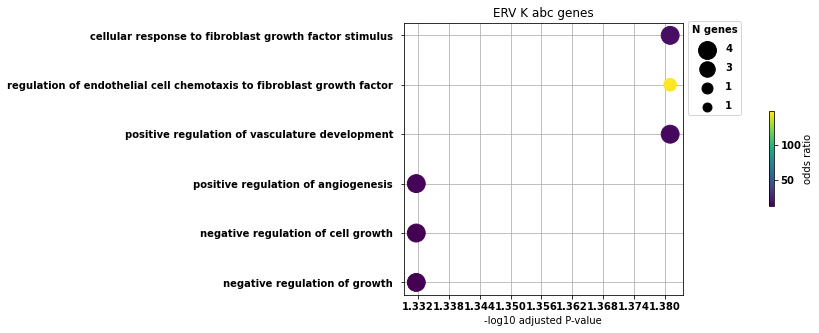

In [42]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=10, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('ERV K abc genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/ERVK_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [49]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/107_genes.txt'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [50]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


In [51]:
!head ../../../data/for_figures/nathan/abc_3_25/107_genes.txt

ABI3BP
AEBP2
AK5
ARL16
ATF7IP2
ATP6AP1L
B4GALNT4
BNIP3
BUD31
CAPN3


In [52]:
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,aerobic electron transport chain (GO:0019646),6/70,0.000002,0.000994,0,0,18.590625,244.775282,NDUFAB1;NDUFB2;CYC1;NDUFV3;COX5B;NDUFV1
1,GO_Biological_Process_2021,mitochondrial ATP synthesis coupled electron t...,6/71,0.000002,0.000994,0,0,18.303692,239.459645,NDUFAB1;NDUFB2;CYC1;NDUFV3;COX5B;NDUFV1
2,GO_Biological_Process_2021,negative regulation of programmed cell death (...,10/381,0.000035,0.010166,0,0,5.481525,56.221664,HAX1;TCIM;DDRGK1;IL7;HGF;BNIP3;CAPN3;SERPINB9;...
3,GO_Biological_Process_2021,"mitochondrial electron transport, NADH to ubiq...",4/39,0.000053,0.010166,0,0,22.250980,219.004141,NDUFAB1;NDUFB2;NDUFV3;NDUFV1
4,GO_Biological_Process_2021,negative regulation of apoptotic process (GO:0...,11/485,0.000053,0.010166,0,0,4.743948,46.684974,HAX1;TCIM;DDRGK1;IL7;HGF;BNIP3;CAPN3;SERPINB9;...
...,...,...,...,...,...,...,...,...,...,...
950,GO_Biological_Process_2021,organelle organization (GO:0006996),1/420,0.895198,0.898963,0,0,0.442664,0.049008,HAX1
951,GO_Biological_Process_2021,nervous system development (GO:0007399),1/447,0.909494,0.912360,0,0,0.415289,0.039397,SLITRK6
952,GO_Biological_Process_2021,positive regulation of nucleic acid-templated ...,1/511,0.936123,0.938088,0,0,0.361979,0.023894,CAPN3
953,GO_Biological_Process_2021,protein ubiquitination (GO:0016567),1/525,0.940820,0.941806,0,0,0.352054,0.021476,RNF11


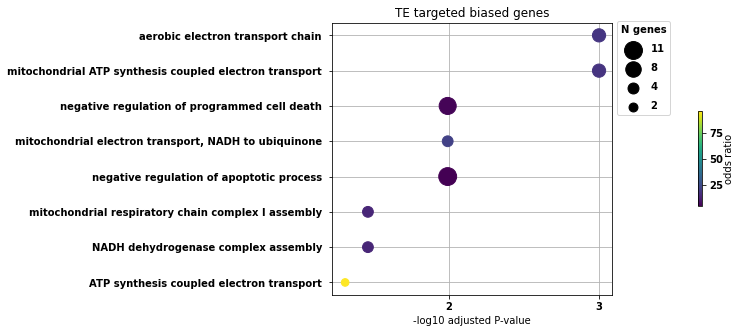

In [54]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=10, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('TE targeted biased genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/ERVK_abc.png", transparent=True, dpi=400, bbox_inches='tight')

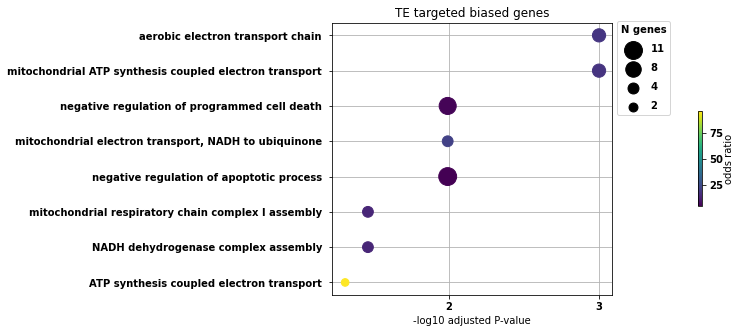

In [54]:
# dotplot(enr.res2d, title ='conserved abc', cmap='viridis')
fig, ax = plt.subplots(figsize=(7.7, 5))
ax = plot_enr(enr.res2d, ax, round_to=1, top_term=10, color='odds')
ax.grid()
ax.set_axisbelow(True)
ax.set_title('TE targeted biased genes')
# plt.savefig("../../../figures/gex_final/mammal_L3_exc_geo.pdf", transparent=True, dpi=400, bbox_inches='tight')
plt.savefig("../../../figures/for_nathan/ERVK_abc.png", transparent=True, dpi=400, bbox_inches='tight')

In [57]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/ltr13.gene'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [58]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-03-30 14:32:51,839 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [15]:
gene_list = '../../../data/for_figures/nathan/abc_3_25/L5_ET_human_spec_abc_targets.gene'
gene_sets = ['GO_Biological_Process_2021', ]
background = '../../../data/for_figures/nathan/fine_mapped/any_gene_with_abc_background_set.txt'

In [16]:
enr = gp.enrichr(gene_list = gene_list, gene_sets=gene_sets, background = background)

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2023-04-01 16:18:56,547 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [17]:
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,protein sumoylation (GO:0016925),5/55,0.000357,0.443800,0,0,9.091244,72.170566,NUP214;ZNF451;KIAA1586;ZBED1;NUP160
1,GO_Biological_Process_2021,positive regulation of nuclear cell cycle DNA ...,2/6,0.001787,0.468964,0,0,44.940909,284.361785,CDC7;INO80
2,GO_Biological_Process_2021,regulation of microtubule binding (GO:1904526),2/7,0.002483,0.468964,0,0,35.950909,215.645068,MAP2;GAS8
3,GO_Biological_Process_2021,heart trabecula formation (GO:0060347),2/7,0.002483,0.468964,0,0,35.950909,215.645068,TGFBR3;ADGRG6
4,GO_Biological_Process_2021,cytoplasmic pattern recognition receptor signa...,3/27,0.003242,0.468964,0,0,11.275114,64.624068,CASP8;TIFA;ALPK1
